#### Adaptive linear neurons and the convergence of learning

In [14]:
import numpy as np
import pandas as pd

class Adaline():
    def __init__(self, learning_rate = 0.01, n_iter = 50):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
    
    def fit(self, X, Y):
        self.weights = np.random.rand(X.shape[1] + 1)
        self.cost_ = []
        
        for _ in range(self.n_iter):
            predictions = self.predict(X)
            errors = (Y - predictions)
            self.weights[1:] += self.learning_rate * X.T.dot(errors)
            self.weights[0] += self.learning_rate * errors.sum()
            cost = (errors ** 2).sum() / 2
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

---

#### Reading data

In [3]:
df_iris = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)

df_iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


---

#### Preparing data

In [7]:
X = df_iris.iloc[:100, [0,2]].values
Y = df_iris.iloc[:100, 4].values

Y = np.where(Y == 'Iris-setosa', -1, 1)

----

#### Running Classifier

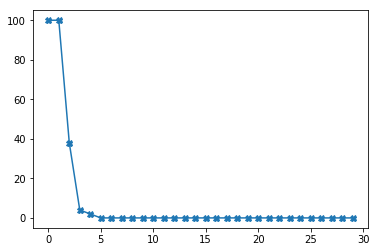

In [65]:
import matplotlib.pyplot as plt

%matplotlib inline

ada_classifier = Adaline(learning_rate = 0.001, n_iter = 30)
ada_classifier.fit(X,Y)

plt.plot(ada_classifier.cost_, marker = 'X')
